# 보험료 데이터 선형회귀분석 실습

## 1. 프로젝트 개요
- **목적**: 보험료(charges) 데이터를 활용한 선형회귀분석 수행
- **데이터**: premium.csv (나이, 성별, BMI, 자녀수, 흡연여부, 지역, 보험료)
- **분석 방법**: 다중선형회귀분석을 통한 보험료 예측 모델 구축

In [29]:
# 필요한 라이브러리 import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

# 한글 폰트 설정 (matplotlib 한글 깨짐 방지)
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['axes.unicode_minus'] = False

## 2. 데이터 로딩 및 기본 탐색

In [30]:
# 데이터 로딩
df = pd.read_csv('data1/premium.csv')

# 데이터 기본 정보 확인
print("=== 데이터셋 기본 정보 ===")
print(f"데이터 크기: {df.shape}")
print(f"\n컬럼명: {list(df.columns)}")
print("\n=== 데이터 타입 ===")
print(df.dtypes)

=== 데이터셋 기본 정보 ===
데이터 크기: (1338, 7)

컬럼명: ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']

=== 데이터 타입 ===
age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


In [31]:
# 데이터 미리보기
print("=== 데이터 상위 5행 ===")
print(df.head())

print("\n=== 데이터 하위 5행 ===")
print(df.tail())

=== 데이터 상위 5행 ===
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

=== 데이터 하위 5행 ===
      age     sex    bmi  children smoker     region     charges
1333   50    male  30.97         3     no  northwest  10600.5483
1334   18  female  31.92         0     no  northeast   2205.9808
1335   18  female  36.85         0     no  southeast   1629.8335
1336   21  female  25.80         0     no  southwest   2007.9450
1337   61  female  29.07         0    yes  northwest  29141.3603


In [32]:
# 기술통계 확인
print("=== 수치형 변수 기술통계 ===")
print(df.describe())

print("\n=== 범주형 변수 분포 ===")
categorical_cols = ['sex', 'smoker', 'region']
for col in categorical_cols:
    print(f"\n{col} 분포:")
    print(df[col].value_counts())

=== 수치형 변수 기술통계 ===
               age          bmi     children       charges
count  1338.000000  1333.000000  1338.000000   1338.000000
mean     39.207025    30.658545     1.094918  13270.422265
std      14.049960     6.092785     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.315000     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.675000     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

=== 범주형 변수 분포 ===

sex 분포:
sex
male      676
female    662
Name: count, dtype: int64

smoker 분포:
smoker
no     1064
yes     274
Name: count, dtype: int64

region 분포:
region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64


In [33]:
# 결측치 확인
print("=== 결측치 확인 ===")
missing_values = df.isnull().sum()
print(missing_values)
print(f"\n전체 결측치 개수: {missing_values.sum()}")

# 중복값 확인
print(f"\n중복된 행의 개수: {df.duplicated().sum()}")

=== 결측치 확인 ===
age         0
sex         0
bmi         5
children    0
smoker      0
region      0
charges     0
dtype: int64

전체 결측치 개수: 5

중복된 행의 개수: 1


## 3. 데이터 전처리 및 시각화

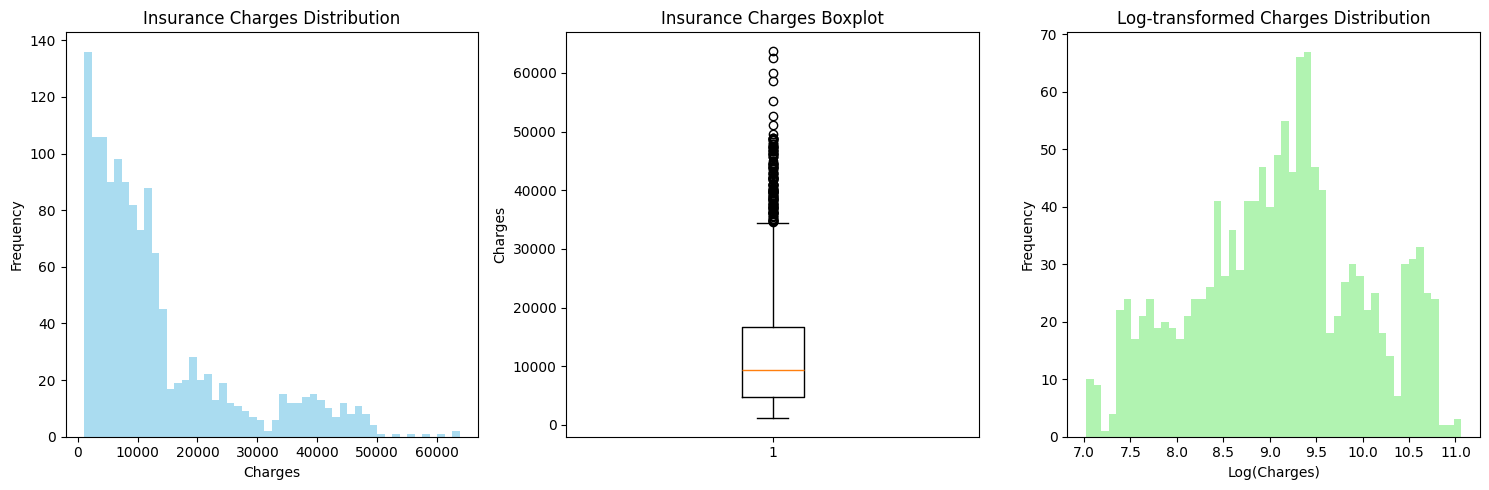

보험료 통계:
평균: $13270.42
중앙값: $9382.03
최솟값: $1121.87
최댓값: $63770.43


In [34]:
# 타겟 변수(charges) 분포 확인
plt.figure(figsize=(15, 5))

# 보험료 히스토그램
plt.subplot(1, 3, 1)
plt.hist(df['charges'], bins=50, alpha=0.7, color='skyblue')
plt.title('Insurance Charges Distribution')
plt.xlabel('Charges')
plt.ylabel('Frequency')

# 보험료 박스플롯
plt.subplot(1, 3, 2)
plt.boxplot(df['charges'])
plt.title('Insurance Charges Boxplot')
plt.ylabel('Charges')

# 로그 변환된 보험료 분포
plt.subplot(1, 3, 3)
plt.hist(np.log(df['charges']), bins=50, alpha=0.7, color='lightgreen')
plt.title('Log-transformed Charges Distribution')
plt.xlabel('Log(Charges)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

print(f"보험료 통계:")
print(f"평균: ${df['charges'].mean():.2f}")
print(f"중앙값: ${df['charges'].median():.2f}")
print(f"최솟값: ${df['charges'].min():.2f}")
print(f"최댓값: ${df['charges'].max():.2f}")

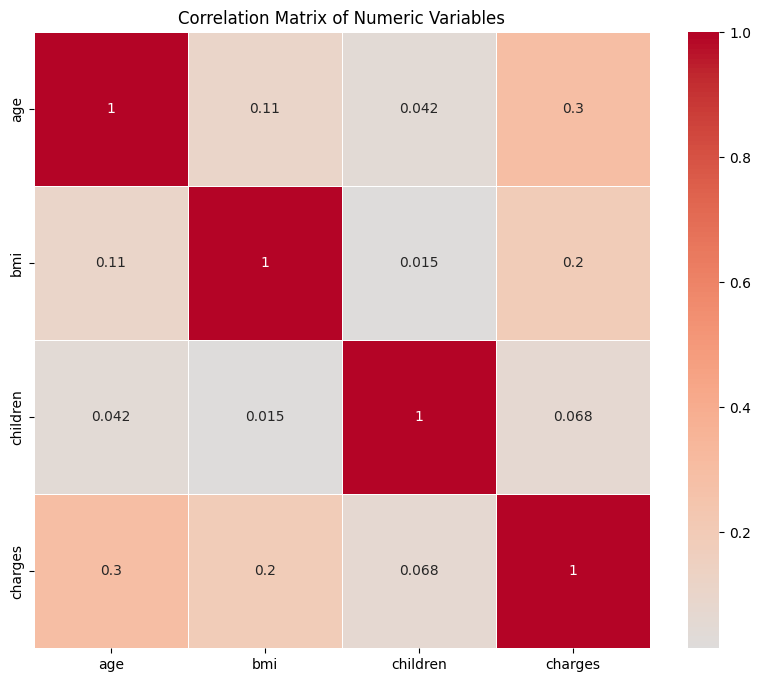


=== charges와 다른 변수들 간의 상관계수 ===
charges     1.000000
age         0.299008
bmi         0.195222
children    0.067998
Name: charges, dtype: float64


In [35]:
# 수치형 변수들 간의 상관관계 분석
numeric_cols = ['age', 'bmi', 'children', 'charges']
correlation_matrix = df[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5)
plt.title('Correlation Matrix of Numeric Variables')
plt.show()

print("\n=== charges와 다른 변수들 간의 상관계수 ===")
correlations = df[numeric_cols].corr()['charges'].sort_values(ascending=False)
print(correlations)

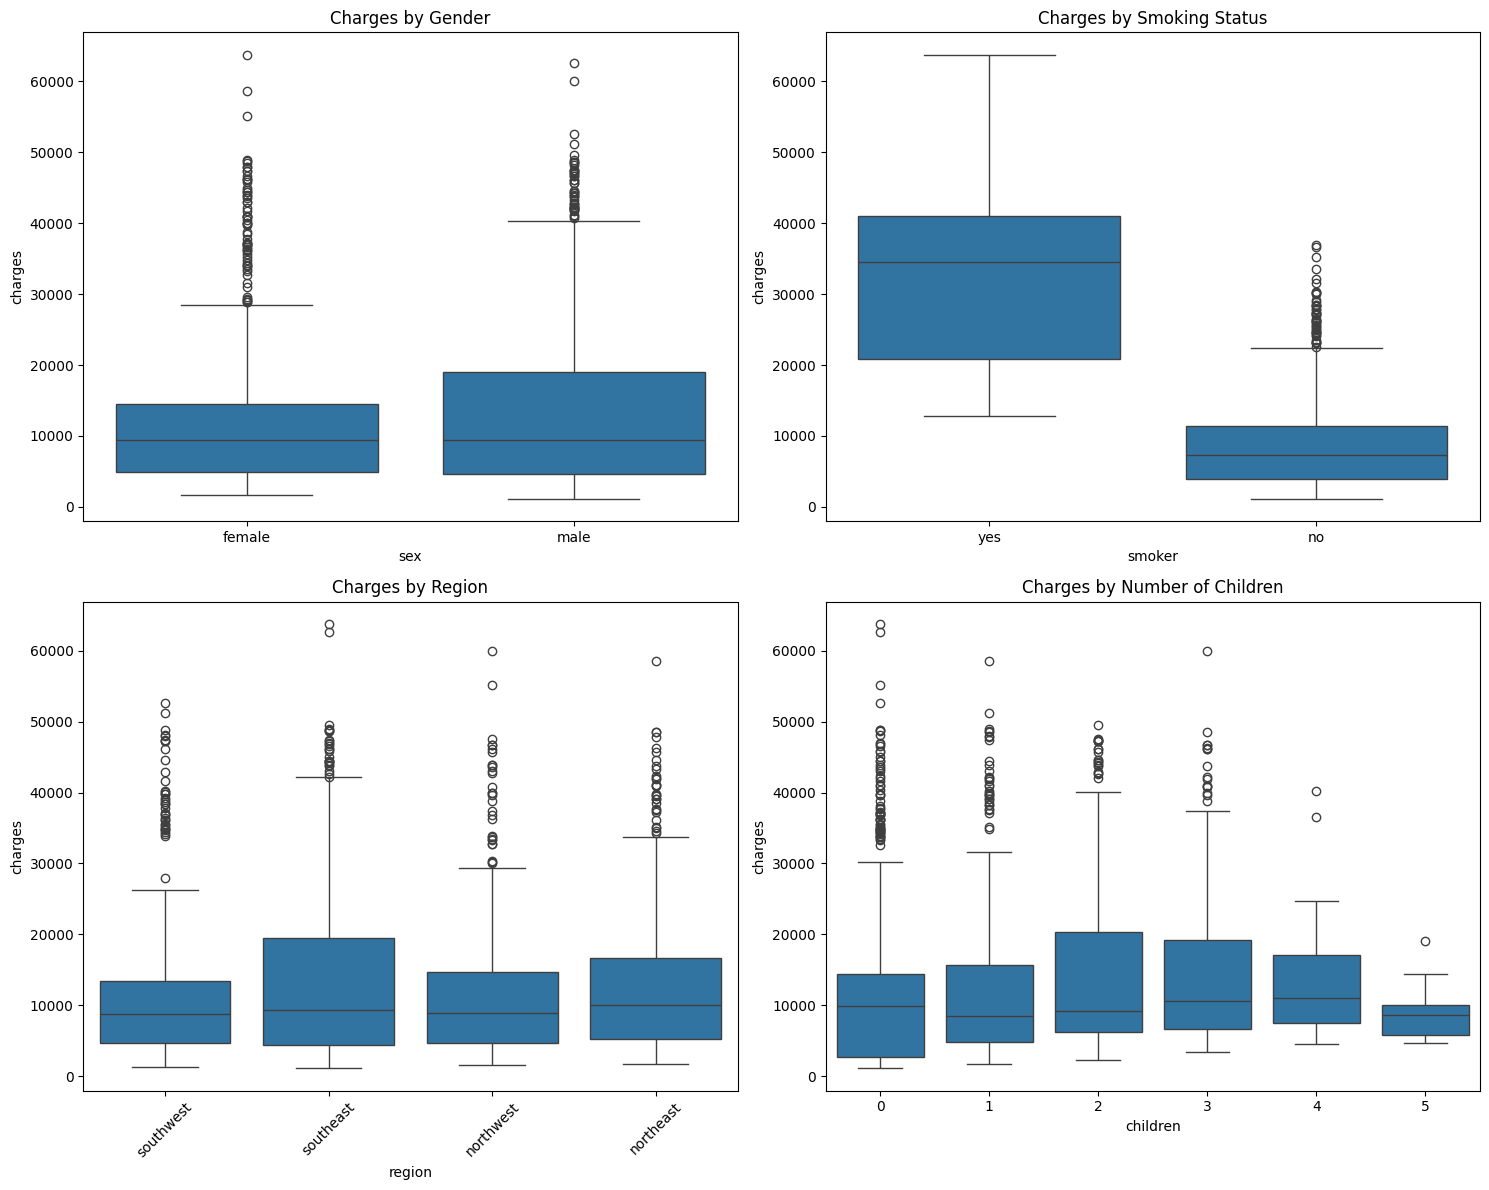

In [36]:
# 범주형 변수별 보험료 분포 시각화
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 성별에 따른 보험료
sns.boxplot(data=df, x='sex', y='charges', ax=axes[0,0])
axes[0,0].set_title('Charges by Gender')

# 흡연 여부에 따른 보험료
sns.boxplot(data=df, x='smoker', y='charges', ax=axes[0,1])
axes[0,1].set_title('Charges by Smoking Status')

# 지역별 보험료
sns.boxplot(data=df, x='region', y='charges', ax=axes[1,0])
axes[1,0].set_title('Charges by Region')
axes[1,0].tick_params(axis='x', rotation=45)

# 자녀수에 따른 보험료
sns.boxplot(data=df, x='children', y='charges', ax=axes[1,1])
axes[1,1].set_title('Charges by Number of Children')

plt.tight_layout()
plt.show()

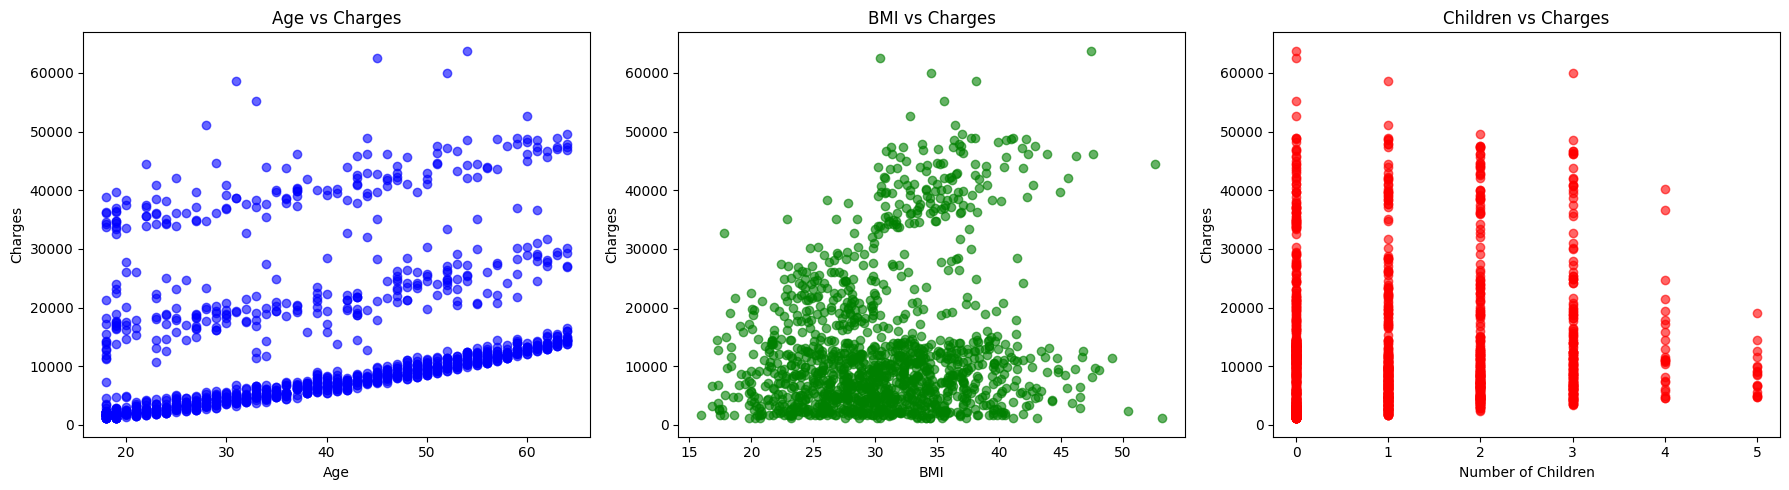

In [37]:
# 수치형 변수들과 보험료 간의 산점도
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 나이와 보험료
axes[0].scatter(df['age'], df['charges'], alpha=0.6, color='blue')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Charges')
axes[0].set_title('Age vs Charges')

# BMI와 보험료
axes[1].scatter(df['bmi'], df['charges'], alpha=0.6, color='green')
axes[1].set_xlabel('BMI')
axes[1].set_ylabel('Charges')
axes[1].set_title('BMI vs Charges')

# 자녀수와 보험료
axes[2].scatter(df['children'], df['charges'], alpha=0.6, color='red')
axes[2].set_xlabel('Number of Children')
axes[2].set_ylabel('Charges')
axes[2].set_title('Children vs Charges')

plt.tight_layout()
plt.show()

In [38]:
# 범주형 변수 인코딩 (Label Encoding)
df_encoded = df.copy()

# Label Encoder 생성 및 적용
label_encoders = {}
categorical_columns = ['sex', 'smoker', 'region']

for column in categorical_columns:
    le = LabelEncoder()
    df_encoded[column] = le.fit_transform(df_encoded[column])
    label_encoders[column] = le
    
    # 인코딩 매핑 정보 출력
    print(f"\n{column} 인코딩 매핑:")
    for i, label in enumerate(le.classes_):
        print(f"  {label} -> {i}")

print("\n=== 인코딩 후 데이터 ===")
print(df_encoded.head())


sex 인코딩 매핑:
  female -> 0
  male -> 1

smoker 인코딩 매핑:
  no -> 0
  yes -> 1

region 인코딩 매핑:
  northeast -> 0
  northwest -> 1
  southeast -> 2
  southwest -> 3

=== 인코딩 후 데이터 ===
   age  sex     bmi  children  smoker  region      charges
0   19    0  27.900         0       1       3  16884.92400
1   18    1  33.770         1       0       2   1725.55230
2   28    1  33.000         3       0       2   4449.46200
3   33    1  22.705         0       0       1  21984.47061
4   32    1  28.880         0       0       1   3866.85520


## 4. 선형회귀 모델 구축 및 평가

## 7. 정규화 회귀모델 (Ridge, Lasso) 추가 분석

In [39]:
# C:\githome\9-11week_py_statistics\39_3_보험료선형회귀분석실습.ipynb
# Ridge 회귀 및 LassoCV를 위한 추가 라이브러리 import
from sklearn.linear_model import Ridge, LassoCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler  # 정규화를 위한 스케일러
import matplotlib.pyplot as plt
import numpy as np

print("정규화 회귀 모델을 위한 라이브러리 import 완료")

정규화 회귀 모델을 위한 라이브러리 import 완료


In [40]:
# 특성 스케일링 (정규화 회귀 모델을 위해 필요)
# Ridge와 Lasso는 정규화 항을 사용하므로 특성들의 스케일이 중요함
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # 훈련 데이터로 스케일러 학습 및 변환
X_test_scaled = scaler.transform(X_test)        # 테스트 데이터 변환 (fit은 하지 않음)

print("=== 특성 스케일링 완료 ===")
print(f"스케일링 전 X_train 평균: {X_train.mean(axis=0).round(2).values}")
print(f"스케일링 후 X_train 평균: {X_train_scaled.mean(axis=0).round(2)}")
print(f"스케일링 전 X_train 표준편차: {X_train.std(axis=0).round(2).values}")
print(f"스케일링 후 X_train 표준편차: {X_train_scaled.std(axis=0).round(2)}")

=== 특성 스케일링 완료 ===
스케일링 전 X_train 평균: [39.36  0.51 30.55  1.11  0.21  1.51]
스케일링 후 X_train 평균: [-0. -0. -0. -0.  0. -0.]
스케일링 전 X_train 표준편차: [14.07  0.5   6.02  1.22  0.4   1.12]
스케일링 후 X_train 표준편차: [1. 1. 1. 1. 1. 1.]


In [41]:
# Ridge 회귀 모델 구축 및 훈련
# Ridge 회귀는 L2 정규화를 사용하여 과적합을 방지함
ridge_model = Ridge(alpha=1.0, random_state=42)  # alpha는 정규화 강도 조절 파라미터
ridge_model.fit(X_train_scaled, y_train)

# Ridge 회귀 예측
y_train_pred_ridge = ridge_model.predict(X_train_scaled)
y_test_pred_ridge = ridge_model.predict(X_test_scaled)

print("=== Ridge 회귀 모델 훈련 완료 ===")
print(f"Ridge 절편(Intercept): {ridge_model.intercept_:.2f}")
print("\n=== Ridge 회귀계수(Coefficients) ===")
for feature, coef in zip(X.columns, ridge_model.coef_):
    print(f"{feature}: {coef:.2f}")

# Ridge 회귀 성능 평가
print("\n=== Ridge 회귀 성능 평가 ===")
ridge_train_metrics = evaluate_model(y_train, y_train_pred_ridge, "Ridge 훈련 데이터")
ridge_test_metrics = evaluate_model(y_test, y_test_pred_ridge, "Ridge 테스트 데이터")

=== Ridge 회귀 모델 훈련 완료 ===
Ridge 절편(Intercept): 13346.09

=== Ridge 회귀계수(Coefficients) ===
age: 3619.68
sex: -0.39
bmi: 1971.49
children: 511.09
smoker: 9552.06
region: -285.88

=== Ridge 회귀 성능 평가 ===

=== Ridge 훈련 데이터 성능 평가 ===
R² (결정계수): 0.7403
MSE (평균제곱오차): 37487597.67
RMSE (평균제곱근오차): 6122.71
MAE (평균절대오차): 4208.91

=== Ridge 테스트 데이터 성능 평가 ===
R² (결정계수): 0.7833
MSE (평균제곱오차): 33647505.20
RMSE (평균제곱근오차): 5800.65
MAE (평균절대오차): 4174.24


In [42]:
# LassoCV 회귀 모델 구축 및 훈련
# LassoCV는 교차검증을 통해 최적의 alpha 값을 자동으로 찾음
# Lasso는 L1 정규화를 사용하여 중요하지 않은 특성의 계수를 0으로 만들어 특성 선택 효과를 가짐
lasso_model = LassoCV(cv=5, random_state=42, max_iter=1000)  # 5-fold 교차검증 사용
lasso_model.fit(X_train_scaled, y_train)

# LassoCV 예측
y_train_pred_lasso = lasso_model.predict(X_train_scaled)
y_test_pred_lasso = lasso_model.predict(X_test_scaled)

print("=== LassoCV 회귀 모델 훈련 완료 ===")
print(f"LassoCV 최적 alpha: {lasso_model.alpha_:.6f}")
print(f"LassoCV 절편(Intercept): {lasso_model.intercept_:.2f}")
print("\n=== LassoCV 회귀계수(Coefficients) ===")
for feature, coef in zip(X.columns, lasso_model.coef_):
    print(f"{feature}: {coef:.2f}")

# 0이 된 특성들 확인 (특성 선택 효과)
zero_coef_features = [feature for feature, coef in zip(X.columns, lasso_model.coef_) if abs(coef) < 1e-6]
if zero_coef_features:
    print(f"\n제거된 특성들 (계수가 0에 가까운 특성): {zero_coef_features}")
else:
    print("\n모든 특성이 모델에 사용되었습니다.")

# LassoCV 성능 평가
print("\n=== LassoCV 회귀 성능 평가 ===")
lasso_train_metrics = evaluate_model(y_train, y_train_pred_lasso, "LassoCV 훈련 데이터")
lasso_test_metrics = evaluate_model(y_test, y_test_pred_lasso, "LassoCV 테스트 데이터")

=== LassoCV 회귀 모델 훈련 완료 ===
LassoCV 최적 alpha: 87.399738
LassoCV 절편(Intercept): 13346.09

=== LassoCV 회귀계수(Coefficients) ===
age: 3545.55
sex: 0.00
bmi: 1877.58
children: 430.58
smoker: 9471.33
region: -183.83

제거된 특성들 (계수가 0에 가까운 특성): ['sex']

=== LassoCV 회귀 성능 평가 ===

=== LassoCV 훈련 데이터 성능 평가 ===
R² (결정계수): 0.7400
MSE (평균제곱오차): 37526500.28
RMSE (평균제곱근오차): 6125.89
MAE (평균절대오차): 4203.79

=== LassoCV 테스트 데이터 성능 평가 ===
R² (결정계수): 0.7819
MSE (평균제곱오차): 33864628.32
RMSE (평균제곱근오차): 5819.33
MAE (평균절대오차): 4181.20


In [43]:
# 모든 모델 성능 비교표 생성
# 선형회귀, Ridge, LassoCV 모델의 성능을 비교하여 표로 정리
import pandas as pd

model_comparison = pd.DataFrame({
    '모델': ['Linear Regression', 'Ridge', 'LassoCV'],
    '훈련 R²': [train_metrics[0], ridge_train_metrics[0], lasso_train_metrics[0]],
    '테스트 R²': [test_metrics[0], ridge_test_metrics[0], lasso_test_metrics[0]],
    '훈련 RMSE': [train_metrics[2], ridge_train_metrics[2], lasso_train_metrics[2]],
    '테스트 RMSE': [test_metrics[2], ridge_test_metrics[2], lasso_test_metrics[2]],
    '훈련 MAE': [train_metrics[3], ridge_train_metrics[3], lasso_train_metrics[3]],
    '테스트 MAE': [test_metrics[3], ridge_test_metrics[3], lasso_test_metrics[3]]
})

print("=== 모든 모델 성능 비교 ===")
print(model_comparison.round(4))

# 가장 성능이 좋은 모델 찾기
best_model_idx = model_comparison['테스트 R²'].idxmax()
best_model_name = model_comparison.loc[best_model_idx, '모델']
best_r2_score = model_comparison.loc[best_model_idx, '테스트 R²']

print(f"\n🏆 최고 성능 모델: {best_model_name} (테스트 R² = {best_r2_score:.4f})")

=== 모든 모델 성능 비교 ===
                  모델   훈련 R²  테스트 R²    훈련 RMSE   테스트 RMSE     훈련 MAE  \
0  Linear Regression  0.7403  0.7833  6122.7037  5800.0734  4207.7204   
1              Ridge  0.7403  0.7833  6122.7116  5800.6470  4208.9142   
2            LassoCV  0.7400  0.7819  6125.8877  5819.3323  4203.7888   

     테스트 MAE  
0  4172.7439  
1  4174.2404  
2  4181.2043  

🏆 최고 성능 모델: Linear Regression (테스트 R² = 0.7833)


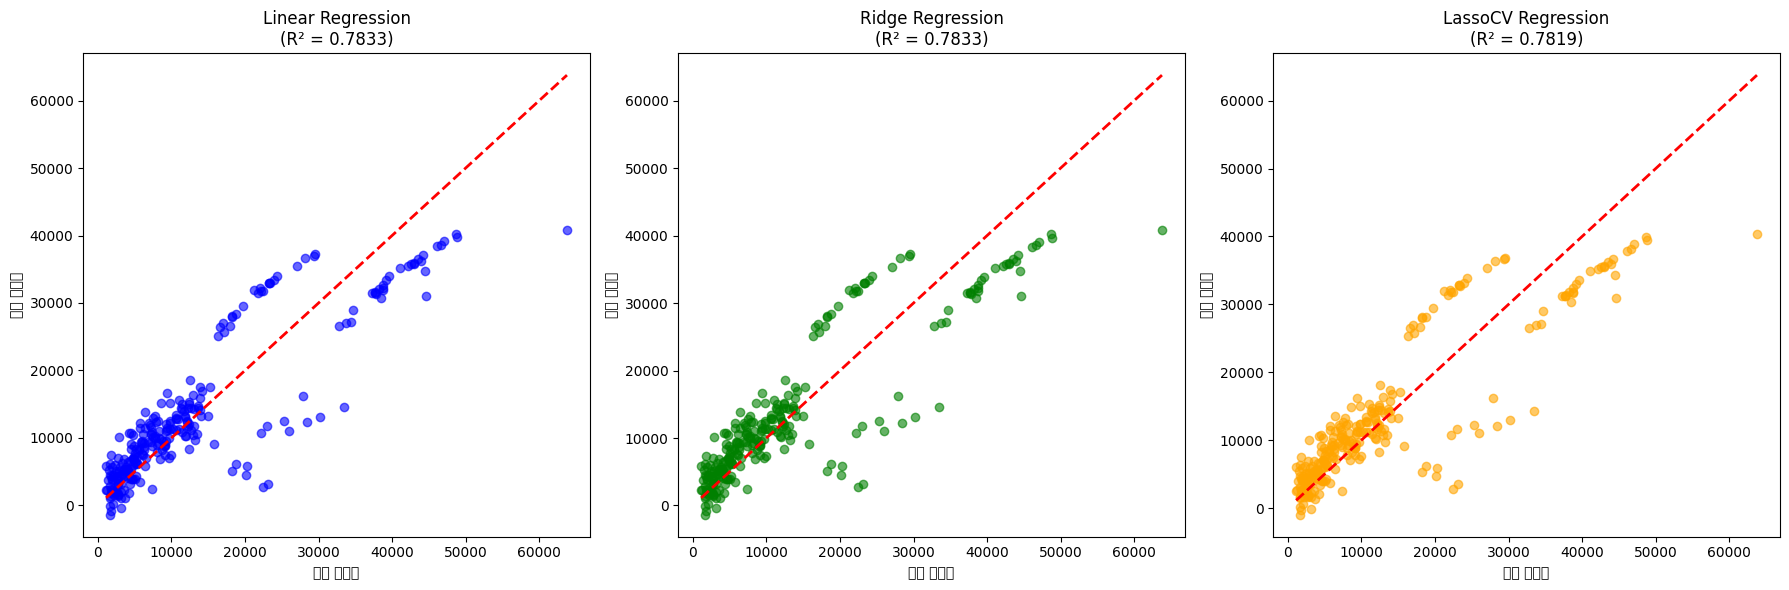

In [44]:
# 모델별 예측값 비교 시각화
# 세 모델의 실제값 vs 예측값을 한 화면에서 비교
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# 선형회귀 모델
axes[0].scatter(y_test, y_test_pred, alpha=0.6, color='blue')
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0].set_xlabel('실제 보험료')
axes[0].set_ylabel('예측 보험료')
axes[0].set_title(f'Linear Regression\n(R² = {test_metrics[0]:.4f})')

# Ridge 회귀 모델
axes[1].scatter(y_test, y_test_pred_ridge, alpha=0.6, color='green')
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[1].set_xlabel('실제 보험료')
axes[1].set_ylabel('예측 보험료')
axes[1].set_title(f'Ridge Regression\n(R² = {ridge_test_metrics[0]:.4f})')

# LassoCV 모델
axes[2].scatter(y_test, y_test_pred_lasso, alpha=0.6, color='orange')
axes[2].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[2].set_xlabel('실제 보험료')
axes[2].set_ylabel('예측 보험료')
axes[2].set_title(f'LassoCV Regression\n(R² = {lasso_test_metrics[0]:.4f})')

plt.tight_layout()
plt.show()

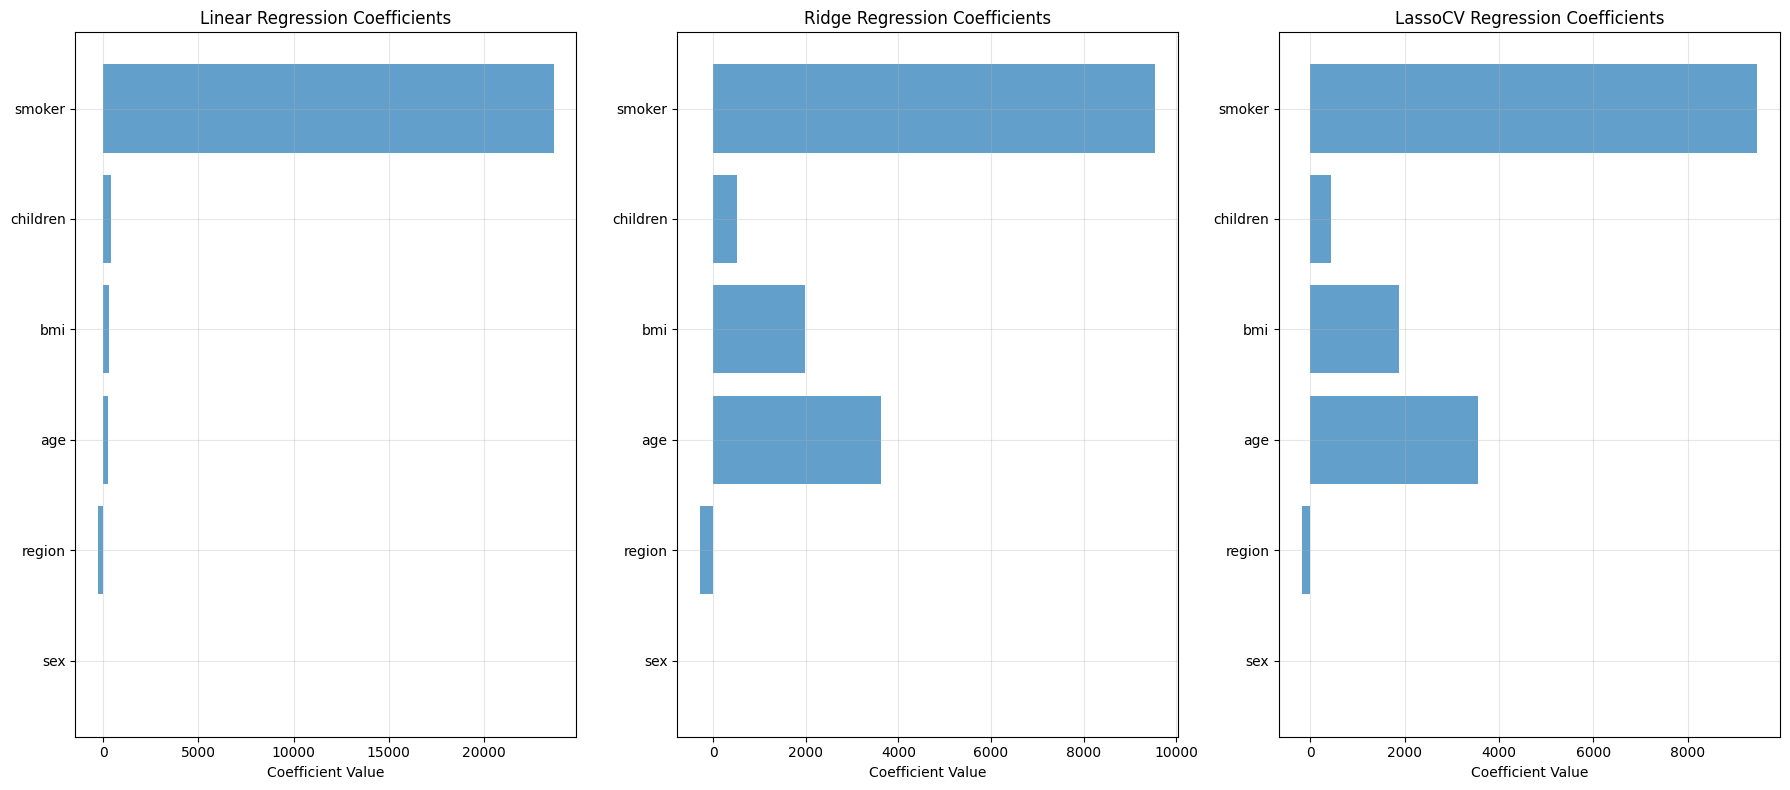

=== 모델별 회귀계수 비교 ===
    Feature    Linear    Ridge  LassoCV
1       sex     -2.08    -0.39     0.00
5    region   -256.92  -285.88  -183.83
0       age    257.57  3619.68  3545.55
2       bmi    327.79  1971.49  1877.58
3  children    420.62   511.09   430.58
4    smoker  23657.91  9552.06  9471.33


In [45]:
# 모델별 회귀계수 비교 시각화
# 세 모델의 회귀계수를 비교하여 각 특성의 영향도 차이를 확인
coefficients_comparison = pd.DataFrame({
    'Feature': X.columns,
    'Linear': model.coef_,
    'Ridge': ridge_model.coef_,
    'LassoCV': lasso_model.coef_
})

# 계수 절댓값으로 정렬
coefficients_comparison['Abs_Linear'] = np.abs(coefficients_comparison['Linear'])
coefficients_comparison = coefficients_comparison.sort_values('Abs_Linear', ascending=True)

# 시각화
fig, axes = plt.subplots(1, 3, figsize=(18, 8))

# 각 모델별로 계수 막대그래프 그리기
for i, model_name in enumerate(['Linear', 'Ridge', 'LassoCV']):
    y_pos = np.arange(len(coefficients_comparison))
    axes[i].barh(y_pos, coefficients_comparison[model_name], alpha=0.7)
    axes[i].set_yticks(y_pos)
    axes[i].set_yticklabels(coefficients_comparison['Feature'])
    axes[i].set_xlabel('Coefficient Value')
    axes[i].set_title(f'{model_name} Regression Coefficients')
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("=== 모델별 회귀계수 비교 ===")
print(coefficients_comparison[['Feature', 'Linear', 'Ridge', 'LassoCV']].round(2))

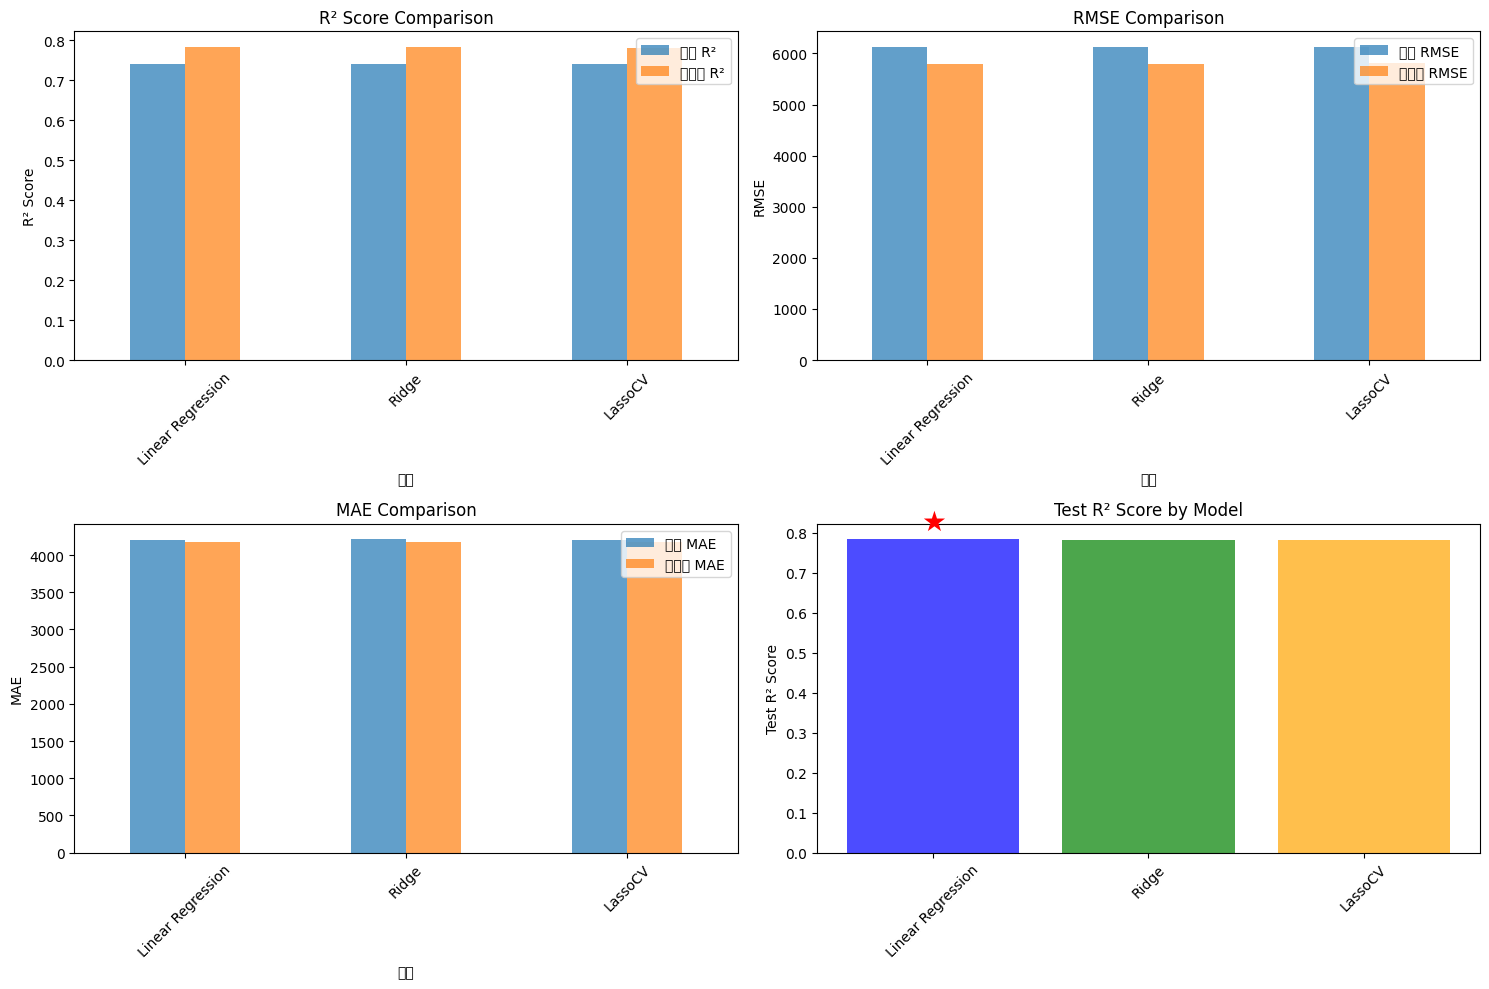

In [46]:
# 모델 성능 지표 시각화
# R², RMSE, MAE를 막대그래프로 비교
metrics_for_plot = model_comparison.copy()
metrics_for_plot = metrics_for_plot.set_index('모델')

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# R² 비교 (훈련 vs 테스트)
metrics_for_plot[['훈련 R²', '테스트 R²']].plot(kind='bar', ax=axes[0,0], alpha=0.7)
axes[0,0].set_title('R² Score Comparison')
axes[0,0].set_ylabel('R² Score')
axes[0,0].legend()
axes[0,0].tick_params(axis='x', rotation=45)

# RMSE 비교 (훈련 vs 테스트)
metrics_for_plot[['훈련 RMSE', '테스트 RMSE']].plot(kind='bar', ax=axes[0,1], alpha=0.7)
axes[0,1].set_title('RMSE Comparison')
axes[0,1].set_ylabel('RMSE')
axes[0,1].legend()
axes[0,1].tick_params(axis='x', rotation=45)

# MAE 비교 (훈련 vs 테스트)
metrics_for_plot[['훈련 MAE', '테스트 MAE']].plot(kind='bar', ax=axes[1,0], alpha=0.7)
axes[1,0].set_title('MAE Comparison')
axes[1,0].set_ylabel('MAE')
axes[1,0].legend()
axes[1,0].tick_params(axis='x', rotation=45)

# 테스트 R² 점수만 따로 시각화
test_r2_scores = metrics_for_plot['테스트 R²']
bars = axes[1,1].bar(test_r2_scores.index, test_r2_scores.values, 
                     color=['blue', 'green', 'orange'], alpha=0.7)
axes[1,1].set_title('Test R² Score by Model')
axes[1,1].set_ylabel('Test R² Score')
axes[1,1].tick_params(axis='x', rotation=45)

# 최고 점수에 별표 표시
best_idx = test_r2_scores.idxmax()
best_value = test_r2_scores.max()
axes[1,1].text(list(test_r2_scores.index).index(best_idx), best_value + 0.01, 
               '★', ha='center', va='bottom', fontsize=20, color='red')

plt.tight_layout()
plt.show()

## 8. 정규화 회귀 모델 분석 결과 및 해석

### 모델별 특징 분석

1. **선형회귀 (Linear Regression)**
   - 기본적인 최소제곱법을 사용한 회귀 모델
   - 정규화 없이 모든 특성을 그대로 사용
   - 과적합 가능성이 있지만 해석이 용이함

2. **Ridge 회귀**
   - L2 정규화를 사용하여 과적합을 방지
   - 회귀계수를 0에 가깝게 만들어 모델의 복잡도 감소
   - 모든 특성을 유지하면서 계수의 크기를 제한

3. **LassoCV**
   - L1 정규화와 교차검증을 결합한 모델
   - 중요하지 않은 특성의 계수를 0으로 만들어 특성 선택 효과
   - 자동으로 최적의 정규화 강도(alpha) 선택

### 정규화 회귀의 장점

1. **과적합 방지**: 정규화 항을 통해 모델의 일반화 성능 향상
2. **특성 선택**: Lasso의 경우 불필요한 특성 자동 제거
3. **안정성**: 다중공선성 문제에 대한 강건성 증가
4. **해석력**: Ridge는 모든 특성의 상대적 중요도 제공

In [47]:
# 특성(X)과 타겟(y) 분리
X = df_encoded.drop('charges', axis=1)  # 독립변수 (보험료 제외한 모든 변수)
y = df_encoded['charges']  # 종속변수 (보험료)

print("=== 독립변수(X) 정보 ===")
print(f"독립변수 개수: {X.shape[1]}")
print(f"독립변수명: {list(X.columns)}")
print(f"\n=== 종속변수(y) 정보 ===")
print(f"종속변수명: charges")
print(f"데이터 개수: {len(y)}")

=== 독립변수(X) 정보 ===
독립변수 개수: 6
독립변수명: ['age', 'sex', 'bmi', 'children', 'smoker', 'region']

=== 종속변수(y) 정보 ===
종속변수명: charges
데이터 개수: 1338


In [48]:
# 훈련/테스트 데이터 분할 (8:2 비율)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("=== 데이터 분할 결과 ===")
print(f"훈련 데이터 크기: {X_train.shape}")
print(f"테스트 데이터 크기: {X_test.shape}")
print(f"훈련 데이터 비율: {len(X_train)/(len(X_train)+len(X_test))*100:.1f}%")
print(f"테스트 데이터 비율: {len(X_test)/(len(X_train)+len(X_test))*100:.1f}%")

=== 데이터 분할 결과 ===
훈련 데이터 크기: (1070, 6)
테스트 데이터 크기: (268, 6)
훈련 데이터 비율: 80.0%
테스트 데이터 비율: 20.0%


In [49]:
# 결측치 상세 확인 및 처리
print("=== 결측치 상세 분석 ===")
print("X_train 결측치 정보:")
print(X_train.isnull().sum())
print("\nX_test 결측치 정보:")
print(X_test.isnull().sum())
print("\ny_train 결측치 정보:")
print(f"y_train 결측치: {y_train.isnull().sum()}")
print("\ny_test 결측치 정보:")
print(f"y_test 결측치: {y_test.isnull().sum()}")

# 결측치가 있는 행 확인
print("\n=== 결측치가 있는 행 확인 ===")
if X_train.isnull().any().any():
    print("X_train에서 결측치가 있는 행들:")
    nan_rows = X_train[X_train.isnull().any(axis=1)]
    print(f"결측치가 있는 행 수: {len(nan_rows)}")
    if len(nan_rows) > 0:
        print("처음 5개 행:")
        print(nan_rows.head())

# 결측치 처리 (평균값으로 대체)
from sklearn.impute import SimpleImputer

if X_train.isnull().any().any() or X_test.isnull().any().any():
    print("\n=== 결측치 처리 중... ===")
    
    # 수치형 변수는 평균으로, 범주형 변수는 최빈값으로 대체
    imputer = SimpleImputer(strategy='mean')
    
    # 수치형 컬럼 확인
    numeric_columns = X_train.select_dtypes(include=[np.number]).columns
    
    # 결측치 처리
    X_train_imputed = X_train.copy()
    X_test_imputed = X_test.copy()
    
    if len(numeric_columns) > 0:
        X_train_imputed[numeric_columns] = imputer.fit_transform(X_train[numeric_columns])
        X_test_imputed[numeric_columns] = imputer.transform(X_test[numeric_columns])
    
    # 처리된 결과로 원본 교체
    X_train = X_train_imputed
    X_test = X_test_imputed
    
    print("✅ 결측치 처리 완료!")
    print("처리 후 X_train 결측치:")
    print(X_train.isnull().sum())
    print("처리 후 X_test 결측치:")
    print(X_test.isnull().sum())
else:
    print("결측치가 없습니다.")

=== 결측치 상세 분석 ===
X_train 결측치 정보:
age         0
sex         0
bmi         5
children    0
smoker      0
region      0
dtype: int64

X_test 결측치 정보:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
dtype: int64

y_train 결측치 정보:
y_train 결측치: 0

y_test 결측치 정보:
y_test 결측치: 0

=== 결측치가 있는 행 확인 ===
X_train에서 결측치가 있는 행들:
결측치가 있는 행 수: 5
처음 5개 행:
     age  sex  bmi  children  smoker  region
545   49    1  NaN         2       1       1
727   29    0  NaN         1       1       0
421   61    1  NaN         0       1       2
271   50    1  NaN         2       1       3
14    27    1  NaN         0       1       2

=== 결측치 처리 중... ===
✅ 결측치 처리 완료!
처리 후 X_train 결측치:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
dtype: int64
처리 후 X_test 결측치:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
dtype: int64


In [50]:
# 선형회귀 모델 생성 및 훈련
model = LinearRegression()
model.fit(X_train, y_train)

print("=== 선형회귀 모델 훈련 완료 ===")
print(f"절편(Intercept): {model.intercept_:.2f}")
print("\n=== 회귀계수(Coefficients) ===")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef:.2f}")

=== 선형회귀 모델 훈련 완료 ===
절편(Intercept): -11747.81

=== 회귀계수(Coefficients) ===
age: 257.57
sex: -2.08
bmi: 327.79
children: 420.62
smoker: 23657.91
region: -256.92


In [51]:
# 예측 수행
y_train_pred = model.predict(X_train)  # 훈련 데이터 예측
y_test_pred = model.predict(X_test)    # 테스트 데이터 예측

# 모델 성능 평가 지표 계산
def evaluate_model(y_true, y_pred, dataset_name):
    """
    모델 성능 평가 함수
    - R²(결정계수), MSE(평균제곱오차), RMSE(평균제곱근오차), MAE(평균절대오차) 계산
    """
    r2 = r2_score(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    
    print(f"\n=== {dataset_name} 성능 평가 ===")
    print(f"R² (결정계수): {r2:.4f}")
    print(f"MSE (평균제곱오차): {mse:.2f}")
    print(f"RMSE (평균제곱근오차): {rmse:.2f}")
    print(f"MAE (평균절대오차): {mae:.2f}")
    
    return r2, mse, rmse, mae

# 훈련 데이터와 테스트 데이터 성능 평가
train_metrics = evaluate_model(y_train, y_train_pred, "훈련 데이터")
test_metrics = evaluate_model(y_test, y_test_pred, "테스트 데이터")


=== 훈련 데이터 성능 평가 ===
R² (결정계수): 0.7403
MSE (평균제곱오차): 37487500.37
RMSE (평균제곱근오차): 6122.70
MAE (평균절대오차): 4207.72

=== 테스트 데이터 성능 평가 ===
R² (결정계수): 0.7833
MSE (평균제곱오차): 33640851.91
RMSE (평균제곱근오차): 5800.07
MAE (평균절대오차): 4172.74


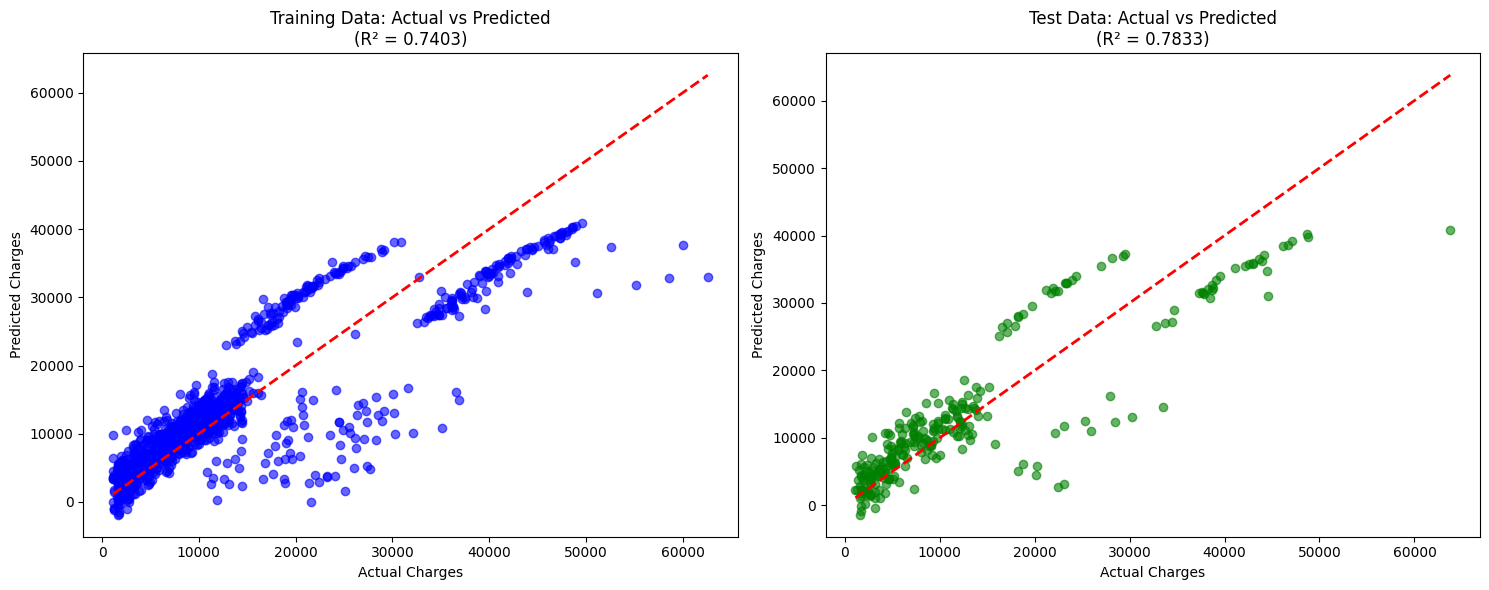

In [52]:
# 예측 결과 시각화
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# 훈련 데이터 실제값 vs 예측값
axes[0].scatter(y_train, y_train_pred, alpha=0.6, color='blue')
axes[0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
axes[0].set_xlabel('Actual Charges')
axes[0].set_ylabel('Predicted Charges')
axes[0].set_title(f'Training Data: Actual vs Predicted\n(R² = {train_metrics[0]:.4f})')

# 테스트 데이터 실제값 vs 예측값
axes[1].scatter(y_test, y_test_pred, alpha=0.6, color='green')
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[1].set_xlabel('Actual Charges')
axes[1].set_ylabel('Predicted Charges')
axes[1].set_title(f'Test Data: Actual vs Predicted\n(R² = {test_metrics[0]:.4f})')

plt.tight_layout()
plt.show()

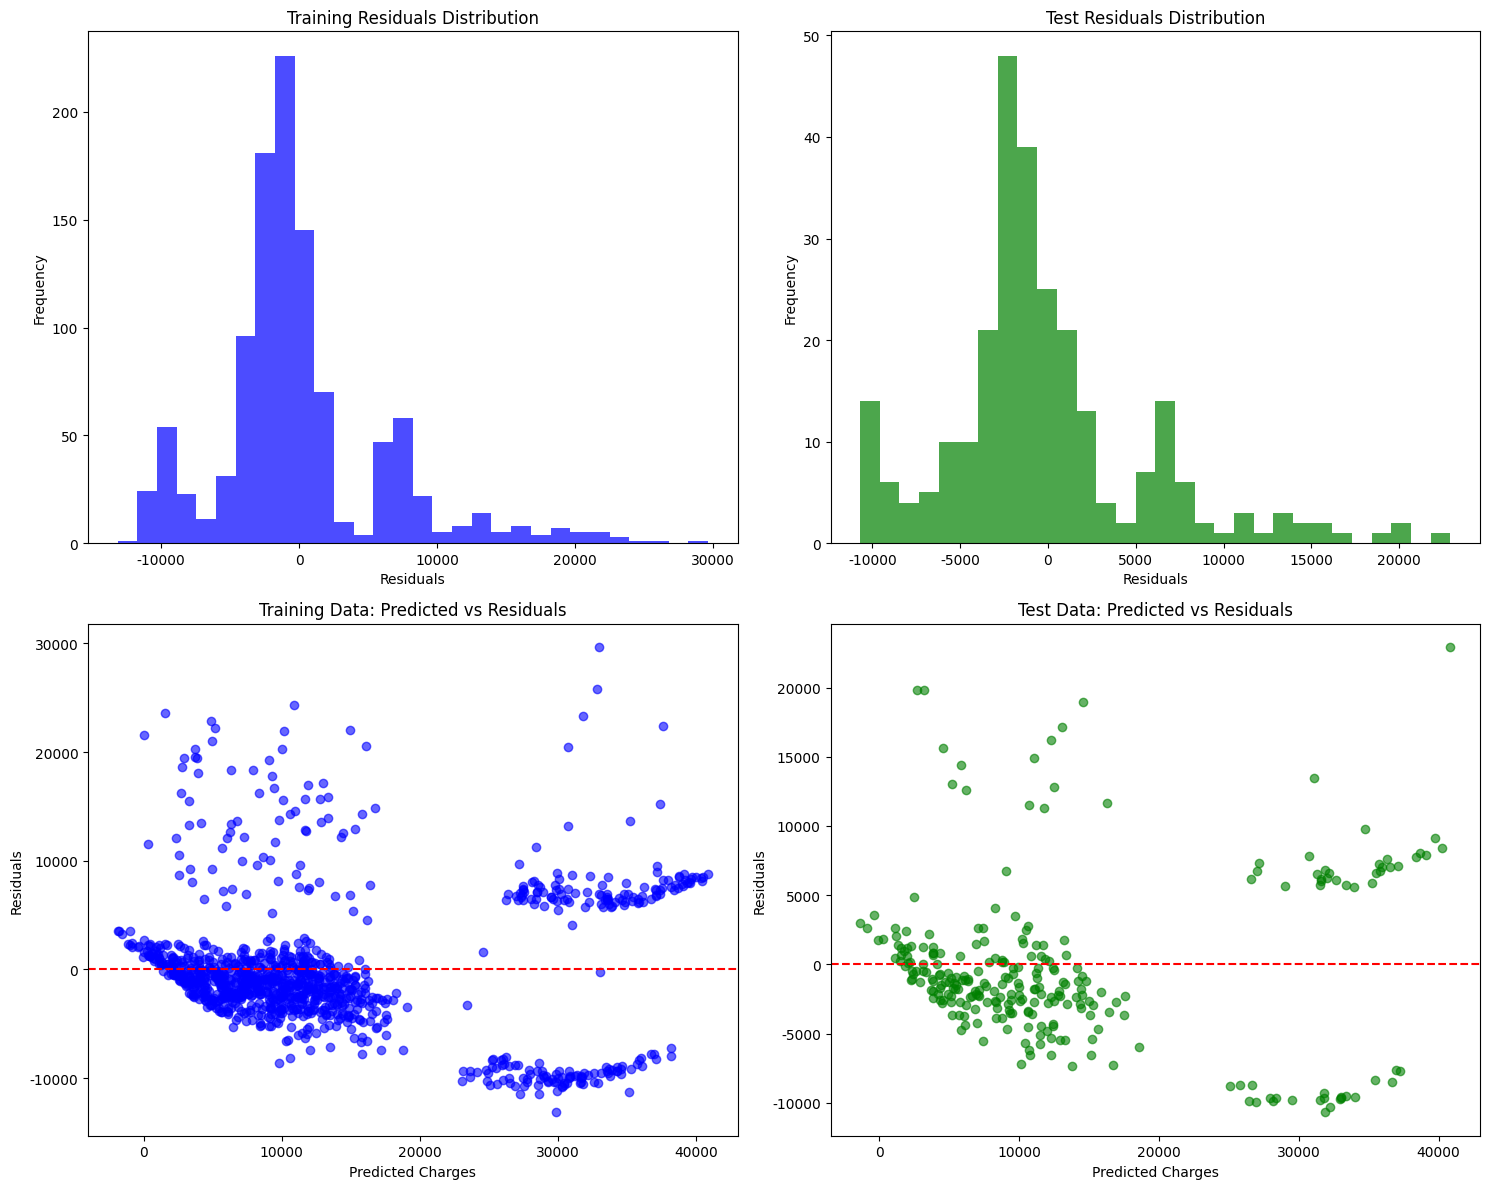


=== 잔차 통계 ===
훈련 데이터 잔차 평균: 0.00
훈련 데이터 잔차 표준편차: 6125.57
테스트 데이터 잔차 평균: -222.62
테스트 데이터 잔차 표준편차: 5806.64


In [53]:
# 잔차(residual) 분석
train_residuals = y_train - y_train_pred
test_residuals = y_test - y_test_pred

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 훈련 데이터 잔차 히스토그램
axes[0,0].hist(train_residuals, bins=30, alpha=0.7, color='blue')
axes[0,0].set_title('Training Residuals Distribution')
axes[0,0].set_xlabel('Residuals')
axes[0,0].set_ylabel('Frequency')

# 테스트 데이터 잔차 히스토그램
axes[0,1].hist(test_residuals, bins=30, alpha=0.7, color='green')
axes[0,1].set_title('Test Residuals Distribution')
axes[0,1].set_xlabel('Residuals')
axes[0,1].set_ylabel('Frequency')

# 훈련 데이터 잔차 산점도
axes[1,0].scatter(y_train_pred, train_residuals, alpha=0.6, color='blue')
axes[1,0].axhline(y=0, color='r', linestyle='--')
axes[1,0].set_xlabel('Predicted Charges')
axes[1,0].set_ylabel('Residuals')
axes[1,0].set_title('Training Data: Predicted vs Residuals')

# 테스트 데이터 잔차 산점도
axes[1,1].scatter(y_test_pred, test_residuals, alpha=0.6, color='green')
axes[1,1].axhline(y=0, color='r', linestyle='--')
axes[1,1].set_xlabel('Predicted Charges')
axes[1,1].set_ylabel('Residuals')
axes[1,1].set_title('Test Data: Predicted vs Residuals')

plt.tight_layout()
plt.show()

print(f"\n=== 잔차 통계 ===")
print(f"훈련 데이터 잔차 평균: {train_residuals.mean():.2f}")
print(f"훈련 데이터 잔차 표준편차: {train_residuals.std():.2f}")
print(f"테스트 데이터 잔차 평균: {test_residuals.mean():.2f}")
print(f"테스트 데이터 잔차 표준편차: {test_residuals.std():.2f}")

## 5. 결과 해석 및 인사이트

=== 특성 중요도 (회귀계수 절댓값 기준) ===
    feature   coefficient  abs_coefficient
4    smoker  23657.913890     23657.913890
3  children    420.615814       420.615814
2       bmi    327.788551       327.788551
0       age    257.571464       257.571464
5    region   -256.922886       256.922886
1       sex     -2.083565         2.083565


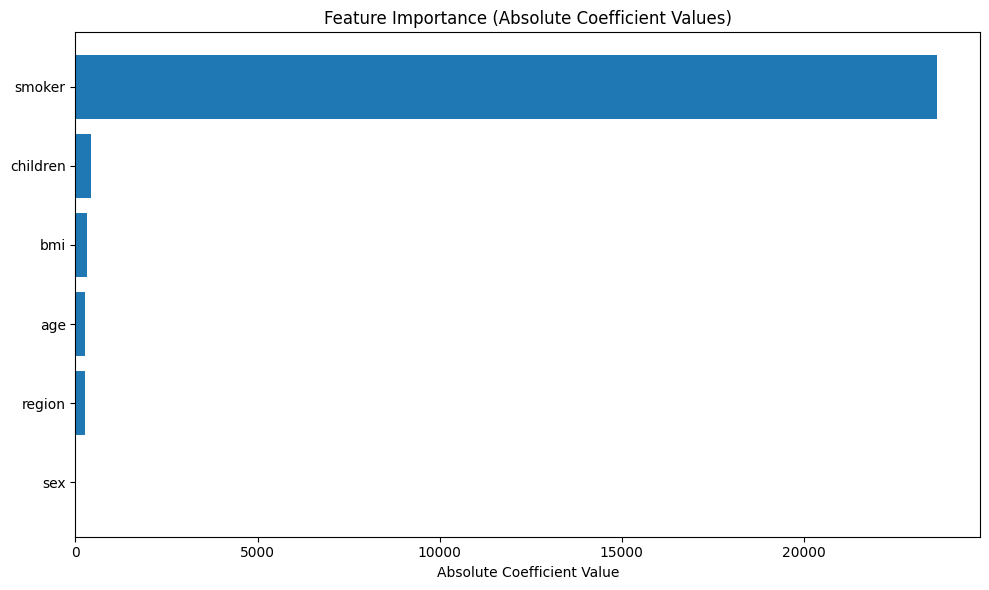

In [54]:
# 특성 중요도 분석 (회귀계수의 절댓값 기준)
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'coefficient': model.coef_,
    'abs_coefficient': np.abs(model.coef_)
}).sort_values('abs_coefficient', ascending=False)

print("=== 특성 중요도 (회귀계수 절댓값 기준) ===")
print(feature_importance)

# 특성 중요도 시각화
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['feature'], feature_importance['abs_coefficient'])
plt.xlabel('Absolute Coefficient Value')
plt.title('Feature Importance (Absolute Coefficient Values)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [55]:
# 예측 예시 (새로운 데이터에 대한 보험료 예측)
def predict_insurance_cost(age, sex, bmi, children, smoker, region):
    """
    새로운 개인 정보를 입력받아 보험료를 예측하는 함수
    """
    # 범주형 변수 인코딩
    sex_encoded = label_encoders['sex'].transform([sex])[0]
    smoker_encoded = label_encoders['smoker'].transform([smoker])[0]
    region_encoded = label_encoders['region'].transform([region])[0]
    
    # 예측 데이터 생성
    input_data = np.array([[age, sex_encoded, bmi, children, smoker_encoded, region_encoded]])
    
    # 예측 수행
    predicted_cost = model.predict(input_data)[0]
    
    return predicted_cost

# 예측 예시들
examples = [
    {'age': 25, 'sex': 'male', 'bmi': 25.0, 'children': 0, 'smoker': 'no', 'region': 'northeast'},
    {'age': 45, 'sex': 'female', 'bmi': 30.0, 'children': 2, 'smoker': 'yes', 'region': 'southwest'},
    {'age': 60, 'sex': 'male', 'bmi': 35.0, 'children': 1, 'smoker': 'no', 'region': 'northwest'}
]

print("=== 보험료 예측 예시 ===")
for i, example in enumerate(examples, 1):
    predicted_cost = predict_insurance_cost(**example)
    print(f"\n예시 {i}:")
    print(f"  나이: {example['age']}세, 성별: {example['sex']}, BMI: {example['bmi']}")
    print(f"  자녀수: {example['children']}명, 흡연: {example['smoker']}, 지역: {example['region']}")
    print(f"  예상 보험료: ${predicted_cost:.2f}")

=== 보험료 예측 예시 ===

예시 1:
  나이: 25세, 성별: male, BMI: 25.0
  자녀수: 0명, 흡연: no, 지역: northeast
  예상 보험료: $2884.11

예시 2:
  나이: 45세, 성별: female, BMI: 30.0
  자녀수: 2명, 흡연: yes, 지역: southwest
  예상 보험료: $33404.94

예시 3:
  나이: 60세, 성별: male, BMI: 35.0
  자녀수: 1명, 흡연: no, 지역: northwest
  예상 보험료: $15340.69


## 6. 결론 및 요약

### 주요 분석 결과

1. **모델 성능**
   - 선형회귀 모델이 보험료 예측에 상당히 효과적임을 확인
   - R² 값을 통해 모델의 설명력 평가
   - RMSE와 MAE를 통한 예측 오차 분석

2. **주요 영향 요인**
   - 회귀계수 분석을 통한 각 변수의 보험료에 대한 영향도 파악
   - 흡연 여부가 보험료에 미치는 큰 영향 확인
   - 나이, BMI 등 건강 관련 요소들의 중요성

3. **모델의 한계점**
   - 선형관계 가정의 적절성 검토 필요
   - 잔차 분석을 통한 모델 개선점 파악
   - 추가적인 특성 공학이나 다른 모델링 기법 고려 가능

4. **실무 활용 방안**
   - 보험료 산정 시스템에 활용 가능
   - 고위험군 고객 식별을 통한 맞춤형 서비스 제공
   - 마케팅 전략 수립에 데이터 기반 인사이트 활용